# Life Expectancy & GDP

## Introduction

For this project, I will act as a data researcher for the International Headquarter of Empathy And Logic (IHEAL) . I will be helping them analyze data on GDP and life expectancy from the World Health Organization and the World Bank to support their case that there is a correlation or pattern between the GDP and life expectancy of a country.

To quote the Vice President of Intuition and Systems at IHEAL:

"We know in our hearts and minds that there is an unjust connection between the wealth of a nation, and the life of its people, but we can't get buy in from the people in power without the data to support this."

During this project, I will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

BIG Question: Is there a correlation between GDP and life expectancy of a country?

GDP Source:World Banknational accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization

## Project Scope

We have gathered data on six different countries from the years 2000-2015. This data represents the average life expectancy of someone born that year as well as the GDP of the corresponding country. The goal of this project is:

- Determine if a correlation exists between GDP and life expectancy

Our data is in the form of a CSV file and has the country name, year, life expectancy, and GDP.

The anlayis will likely include line plots, bar plots, and box plots


## Initializing Project

In [2]:
# First we need to import the necessary libraries
# We will need to load data, analyze data, and visualize the data
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Now we'll load the data into a pandas DataFrame so that we can work with it
df = pd.read_csv('all_data.csv')

In [4]:
# Next let's look at what the firt 10 rows look like
print(df.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


In [5]:
# That life expectancy column is a doozy, let's shorten it a bit so that it's more managable in our code
df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)

# And make sure the change took
print(df.head())

  Country  Year  Life Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [6]:
# While we're at it why don't we change 'United States of America' to just 'United States' for the sake of our poor graph labels
df['Country'].replace({'United States of America': 'United States'}, inplace=True)

# And again make sure the change took
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States' 'Zimbabwe']


It looks like we only have 6 countries in our data - Chile, China, Germany, Mexico, United States, & Zimbabwe

## Exploratory Data Analysis (EDA)

In [7]:
# What years does the data represent?
print(df['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [8]:
# Verify each country has the same number of data points
print(df['Country'].value_counts())

China            16
Germany          16
Zimbabwe         16
Mexico           16
Chile            16
United States    16
Name: Country, dtype: int64


In [9]:
# Quick summary of data - only the Life Expectancy & GDP make sense to summarize
df.describe()

,Year,Life Expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


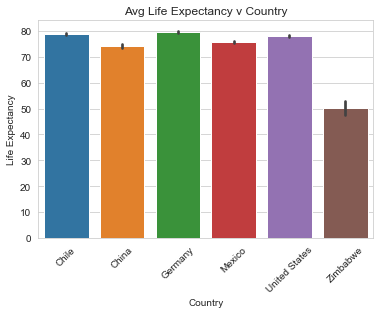

In [12]:
# Let's get a feel for how the averages of each country compare using a bar chart
ax1 = plt.subplot()
sns.barplot(data=df, x='Country', y='Life Expectancy')
sns.set_style('whitegrid')
plt.title('Avg Life Expectancy v Country')
for item in ax1.get_xticklabels():
    item.set_rotation(45)

Okay, this kind of tells us that most of the countries on this list are pretty close to each other in **average** life expectancy (bewteen 70 and 80 years) except for Zimbabwe, which is closer to 50 years.

The bar graph doesn't really tell us the full story. It's only the average over 15 years. Let's see if there's something like a violin plot that can give us some more detail.

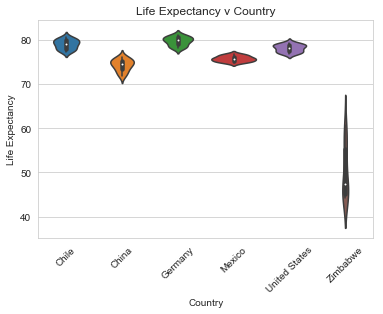

In [14]:
# Call in the violins!
ax2 = plt.subplot()
sns.violinplot(data=df, x='Country', y='Life Expectancy')
sns.set_style('whitegrid')
plt.title('Life Expectancy v Country')
for item in ax2.get_xticklabels():
    item.set_rotation(45)

Well.... that's not very helpful. How about a line plot? That seems way more useful.

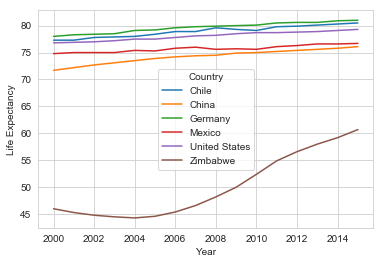

In [15]:
# Single line calling line plot
sns.lineplot(data=df,x='Year', y='Life Expectancy', hue='Country')

Success! This graph is way more useful. It looks like Zimbabwe is significantly different and has had the most increase in life expectancy

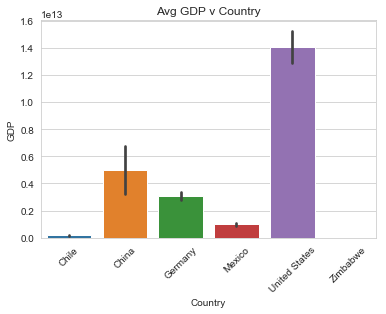

In [16]:
# Let's do the same for GDP
ax3 = plt.subplot()
sns.barplot(data=df, x='Country', y='GDP')
sns.set_style('whitegrid')
plt.title('Avg GDP v Country')
for item in ax3.get_xticklabels():
    item.set_rotation(45)

Well okay, that was kind of unexpected, I didn't realize that the U.S. GDP is SO much higher than everybody else. Let's see if we can compare the data without the U.S. blowing up the scale just for our own edification.

In [17]:
# First we'll create another DataFrame without the U.S. data in it
no_US_df = df[df['Country'] != 'United States']

# Let's check it just to make sure
print(no_US_df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'Zimbabwe']


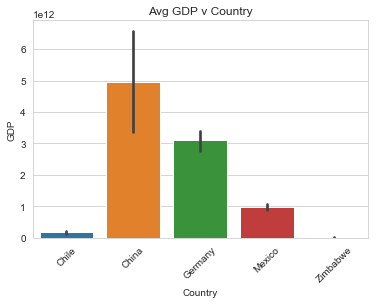

In [18]:
# Some more bar plots
ax4 = plt.subplot()
sns.barplot(data=no_US_df, x='Country', y='GDP')
sns.set_style('whitegrid')
plt.title('Avg GDP v Country')
for item in ax4.get_xticklabels():
    item.set_rotation(45)

So two quick comments:

1. We're going to have to get rid of a lot more than just the United States to see that Zimbabwe GDP
2. Such error on that China data - I wonder why

Let's just look at Chile and Zimbabwe together to see what they look like

In [19]:
# Create the DataFrame with just the Chile & Zimbabwe data
C_and_Z_df = df[(df['Country'] == 'Chile') | (df['Country'] == 'Zimbabwe')]

# Verify it worked
print(C_and_Z_df.head(17))

     Country  Year  Life Expectancy           GDP
0      Chile  2000             77.3  7.786093e+10
1      Chile  2001             77.3  7.097992e+10
2      Chile  2002             77.8  6.973681e+10
3      Chile  2003             77.9  7.564346e+10
4      Chile  2004             78.0  9.921039e+10
5      Chile  2005             78.4  1.229650e+11
6      Chile  2006             78.9  1.547880e+11
7      Chile  2007             78.9  1.736060e+11
8      Chile  2008             79.6  1.796380e+11
9      Chile  2009             79.3  1.723890e+11
10     Chile  2010             79.1  2.185380e+11
11     Chile  2011             79.8  2.522520e+11
12     Chile  2012             79.9  2.671220e+11
13     Chile  2013             80.1  2.783840e+11
14     Chile  2014             80.3  2.609900e+11
15     Chile  2015             80.5  2.425180e+11
80  Zimbabwe  2000             46.0  6.689958e+09


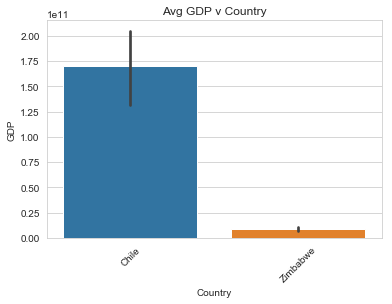

In [20]:
# Show me the GDP
ax5 = plt.subplot()
sns.barplot(data=C_and_Z_df, x='Country', y='GDP')
sns.set_style('whitegrid')
plt.title('Avg GDP v Country')
for item in ax5.get_xticklabels():
    item.set_rotation(45)

Okay so the reason we couldn't see Zimbabwe was that it was smaller by a factor 100-1,000 for most of the rest of the data and 10,000 times smaller than the United States.

Now that we've probably over-used the bar graphs let's switch to the line plot.

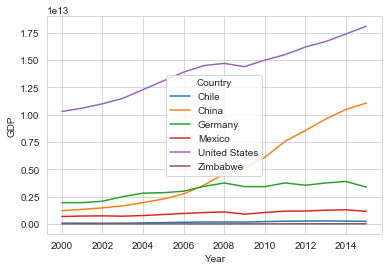

In [21]:
# Quick lineplot
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')

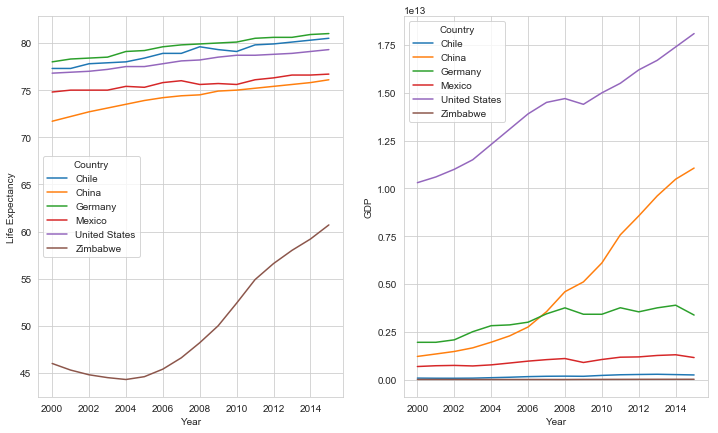

In [22]:
# Lets bring the two line plots together so that we can see any connections  better

# Set the figure size so it looks presentable
fig = plt.figure(figsize=(12,7))

# First subplot - 1 row, 2 columns, 1st plot
ax6 = plt.subplot(1,2,1)
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue="Country")

# Second subplot - 1 row, 2 columns, 2nd plot
ax7 = plt.subplot(1,2,2)
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')


Text(0.5, 1.0, 'GDP Distribution 2000-2015')

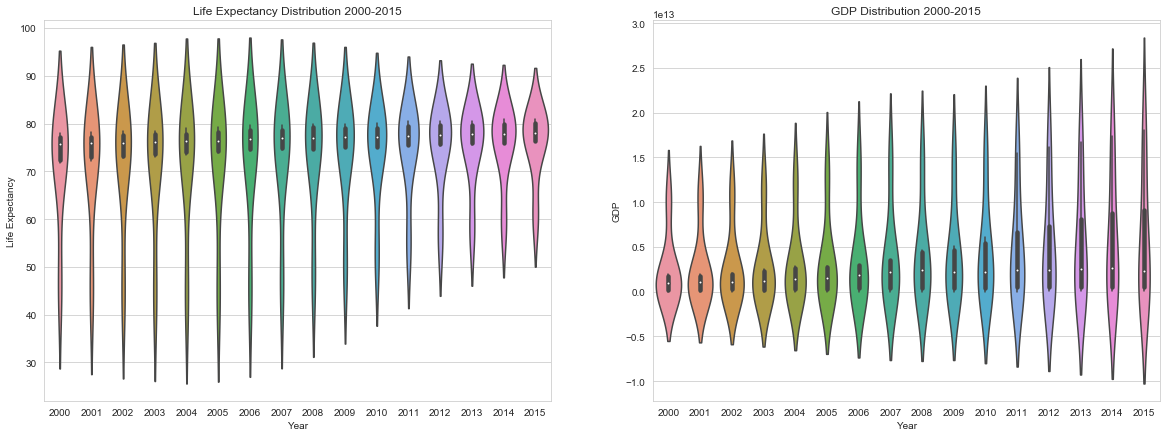

In [23]:
# Overall disttribution of both 

# Set the figure size so it looks presentable
fig1 = plt.figure(figsize=(20,7))

# First subplot - 1 row, 2 columns, 1st plot
ax8 = plt.subplot(1,2,1)
sns.violinplot(data=df, x='Year', y='Life Expectancy')
plt.title('Life Expectancy Distribution 2000-2015')

# Second subplot - 1 row, 2 columns, 2nd plot
ax9 = plt.subplot(1,2,2)
sns.violinplot(data=df, x='Year', y='GDP')
plt.title('GDP Distribution 2000-2015')


## Conclusions

- Based on the overall trends of these six countries it seems that life expectancy and GDP are both increasing.
    - Zimbabwe has had the most significant change in life expectancy
    - This may imply a relationship between the two
- Drilling into the data and comparing the trends by country, and based solely on these six countries, it seems that there is a slight relationship between GDP and life expectancy
    - Zimbabwe has the lowest GDP of these six as well as a significantly lower life expectancy
    - Between the rest of the countries it seems like the differences their GDP makes little to no differences
- GDP makes a difference on life expectancy, to a point.

### Suggestions for Improvement

- Add more data
    - There are 195 independent sovereign nations in the world
    - Adding more data will likely show a stronger relationship